## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

In [2]:
gray_image = cv2.imread("images/notes.png", 0)
negative_image = cv2.bitwise_not(gray_image)
binary_image = cv2.adaptiveThreshold(negative_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 15, -2)

## 3- Plotting

Text(0.5, 1.0, 'Binary image')

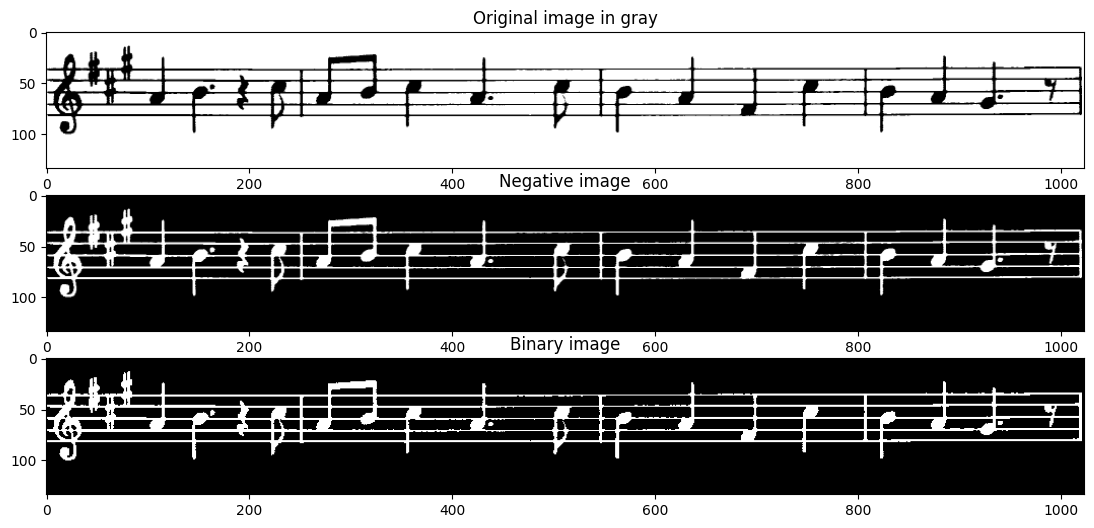

In [3]:
plt.figure(figsize=[17,6])

plt.subplot(311);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray")
plt.subplot(312);plt.imshow(negative_image, cmap='gray');plt.title("Negative image")
plt.subplot(313);plt.imshow(binary_image, cmap='gray');plt.title("Binary image")

## 4- Structure elements for Horizontal Lines

In [4]:
cols = binary_image.shape[1]
horizontal_size = cols // 30

# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
print(horizontalStructure)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


Text(0.5, 1.0, 'horizontal lines in image')

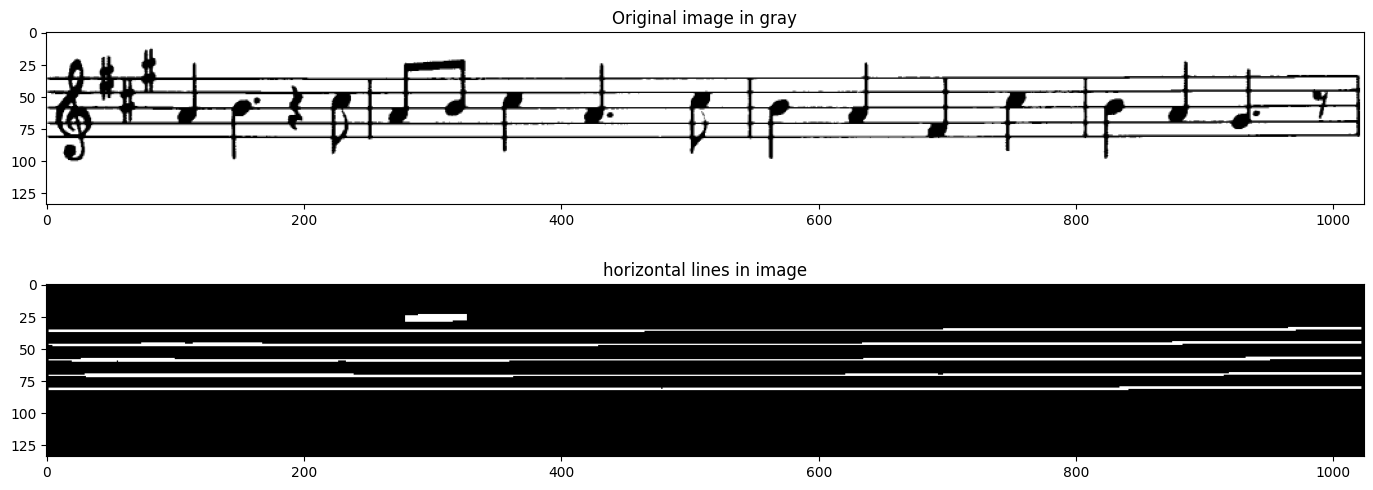

In [5]:
# Apply morphology operations
horizontal = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, horizontalStructure)


plt.figure(figsize=[17,6])

plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray")
plt.subplot(212);plt.imshow(horizontal, cmap='gray');plt.title("horizontal lines in image")

## 4- Structure elements for Vertical Lines

In [6]:
# Specify size on vertical axis
rows = gray_image.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
print(verticalStructure)

[[1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'verical lines in image')

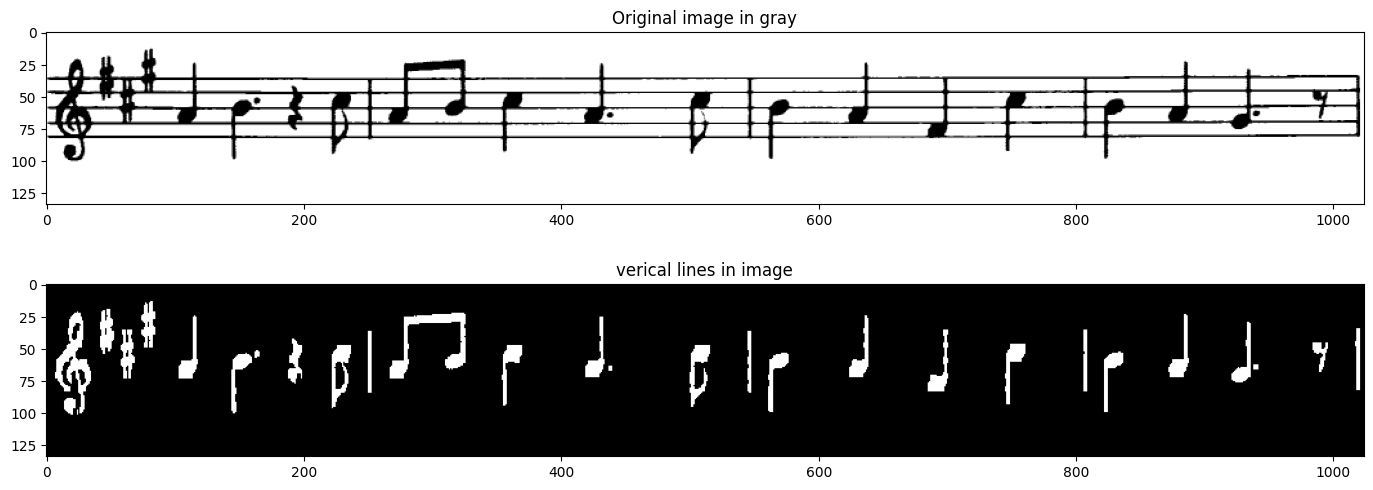

In [8]:
# Apply morphology operations
vertical = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, verticalStructure)


plt.figure(figsize=[17,6])

plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray")
plt.subplot(212);plt.imshow(vertical, cmap='gray');plt.title("verical lines in image")

### - NOT Operation

Text(0.5, 1.0, 'Raw result')

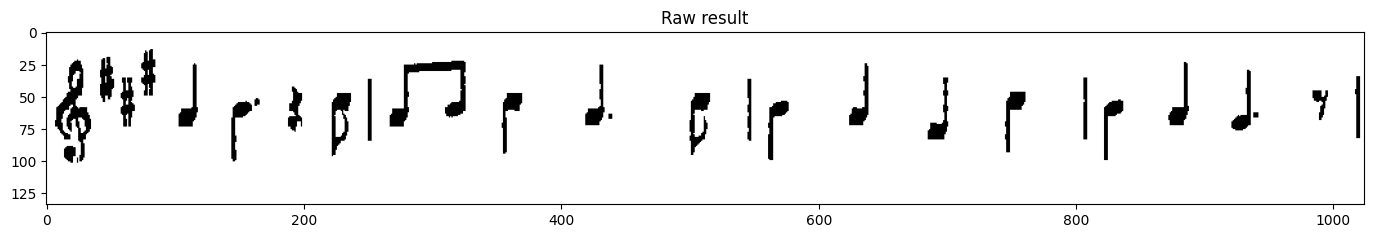

In [9]:
# Inverse vertical image
raw_result = cv2.bitwise_not(vertical)

plt.figure(figsize=[17,6])
plt.imshow(raw_result, cmap='gray');plt.title("Raw result")

# More Operations:

## 1- Soft Edges

Text(0.5, 1.0, 'edges')

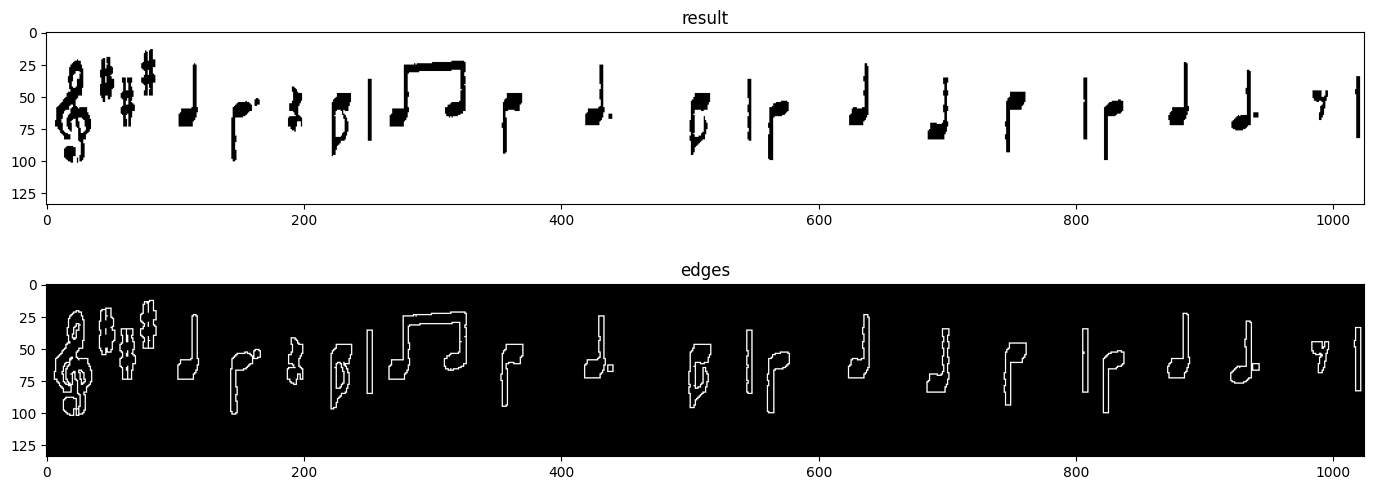

In [10]:
edges = cv2.adaptiveThreshold(raw_result, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 3, -2)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(raw_result, cmap='gray');plt.title("result")
plt.subplot(212);plt.imshow(edges, cmap='gray');plt.title("edges")

## 2- Dialtion

Text(0.5, 1.0, 'dilated edges')

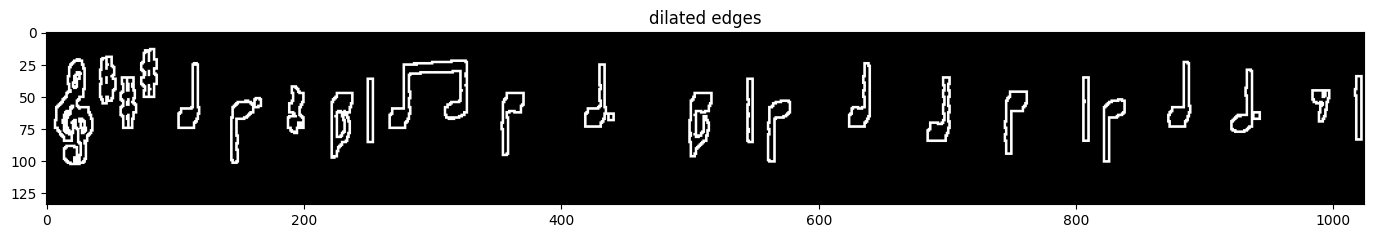

In [11]:
kernel = np.ones((2, 2), np.uint8)
edges = cv2.dilate(edges, kernel)

plt.figure(figsize=[17,6])
plt.imshow(edges, cmap='gray');plt.title("dilated edges")

## 3- Smooth / Blur

Text(0.5, 1.0, 'smoothed version')

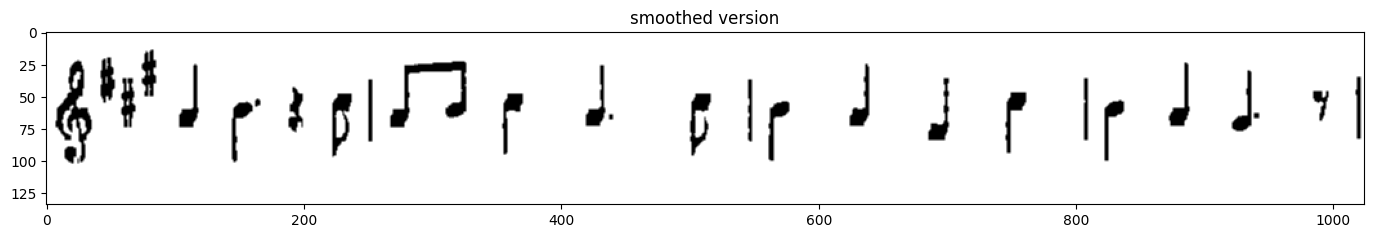

In [12]:
smooth = cv2.blur(raw_result, (2, 2))

plt.figure(figsize=[17,6])
plt.imshow(smooth, cmap='gray');plt.title("smoothed version")

## 4- Final Results

Text(0.5, 1.0, 'Final result')

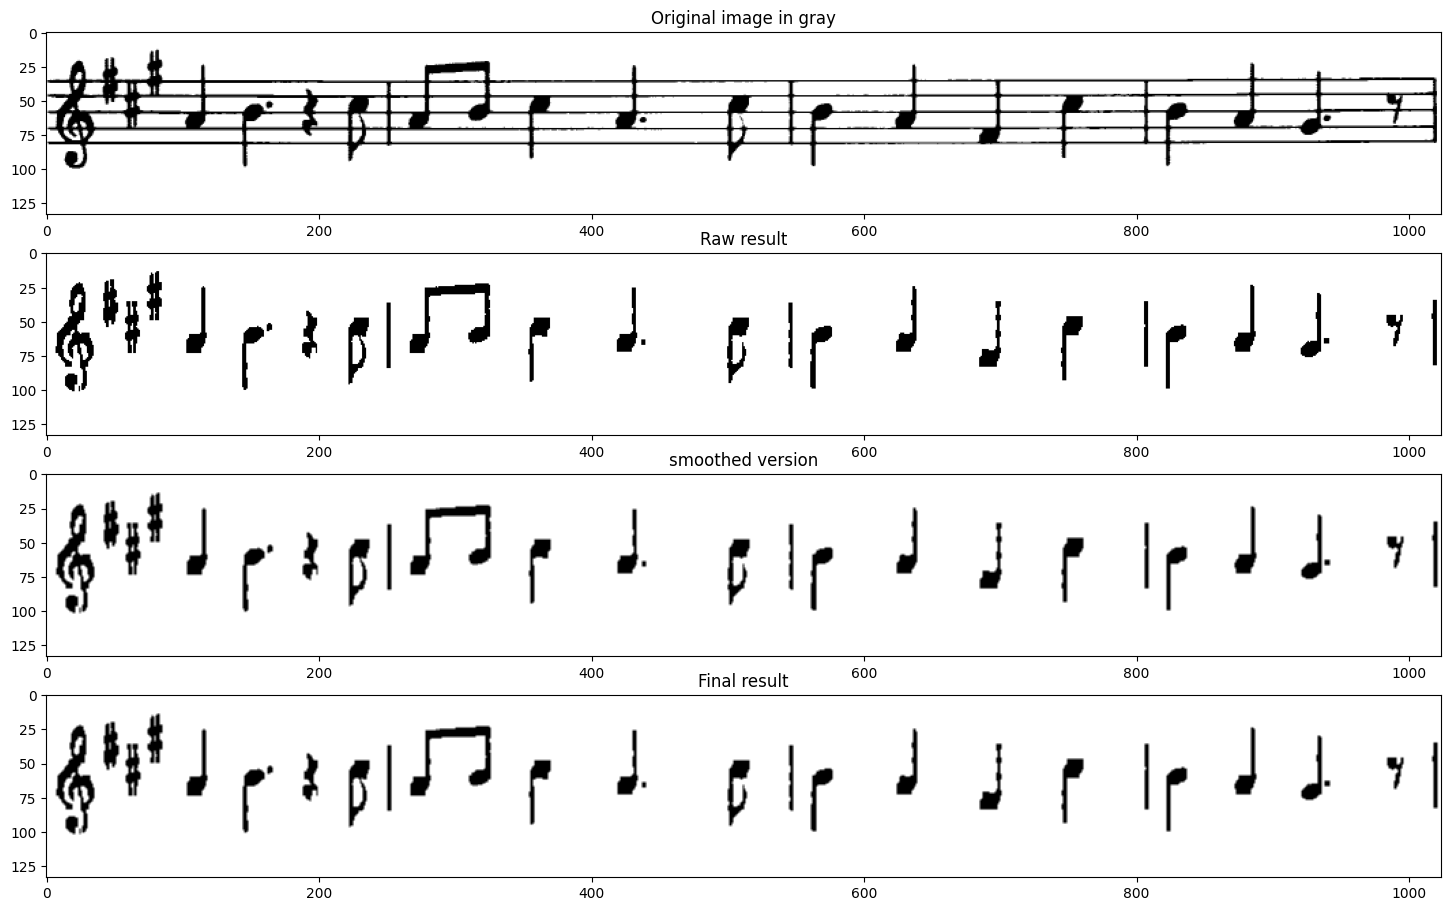

In [13]:
(rows, cols) = np.where(edges != 0)
final_result = np.copy(raw_result)
final_result[rows, cols] = smooth[rows, cols]


plt.figure(figsize=[18,11])

plt.subplot(411);plt.imshow(gray_image, cmap='gray');plt.title("Original image in gray")
plt.subplot(412);plt.imshow(raw_result, cmap='gray');plt.title("Raw result")
plt.subplot(413);plt.imshow(smooth, cmap='gray');plt.title("smoothed version")
plt.subplot(414);plt.imshow(final_result, cmap='gray');plt.title("Final result")